LASSO

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

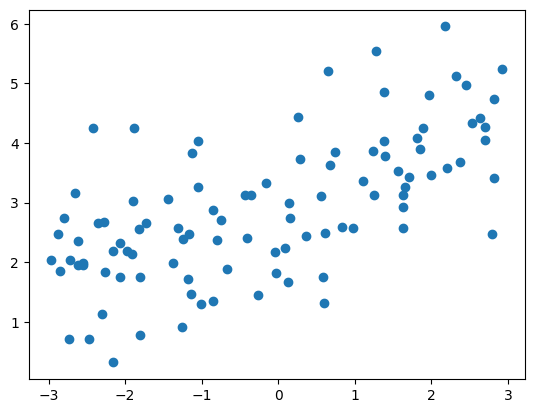

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# 这样传入进去的数据，就会依次调用函数，并传递下去
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [9]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X)
# 看到模型均方误差太大了（40+），肯定是过拟合了
mean_squared_error(y, y_predict)

42.37404957323819

In [10]:
# 把绘图函数封装一下
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

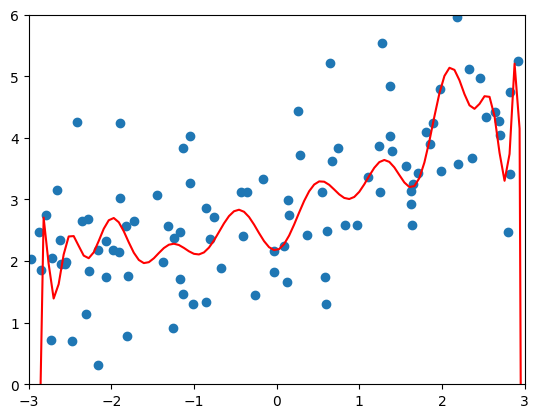

In [13]:
plot_model(poly_reg)

使用LASSO

In [14]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [15]:
# LASSO 的公式是θ的绝对值，不用平方，故 alpha 可以大一点
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259964

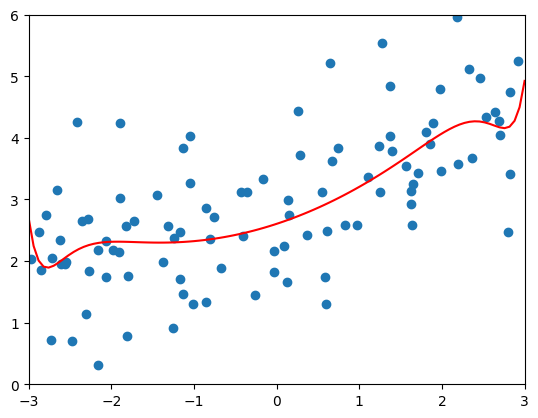

In [16]:
plot_model(lasso1_reg)

In [19]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

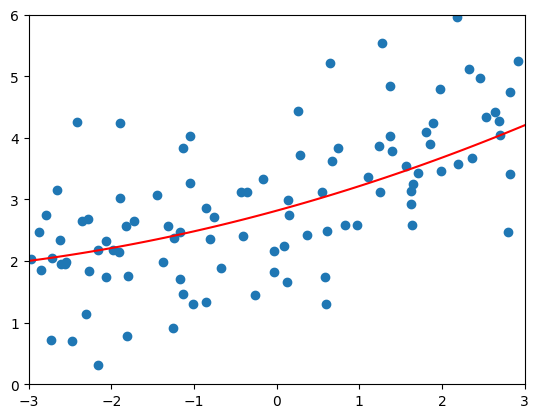

In [20]:
plot_model(lasso2_reg)

In [21]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

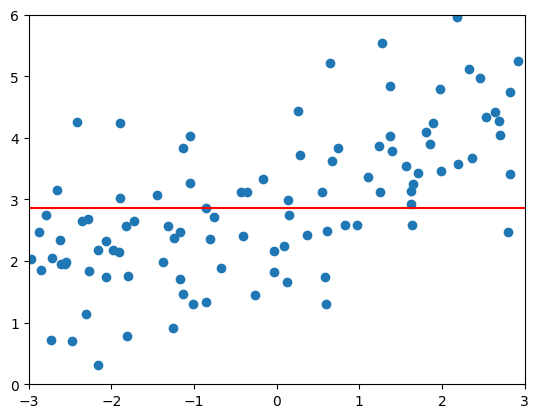

In [22]:
plot_model(lasso3_reg)